In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
import random


In [0]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [0]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def boostrap_mean(sample, sample_size, n_iterations):
	CI = 95
	arr = np.random.choice(sample, size=(n_iterations, sample_size))
	mean_arr = [np.mean(x) for x in arr]
	perc = np.percentile(mean_arr, [(100 - CI)/2, CI + (100 - CI)/2])
	data_mean = np.mean(arr)
	return data_mean, perc[0], perc[1]


(0, 100000)

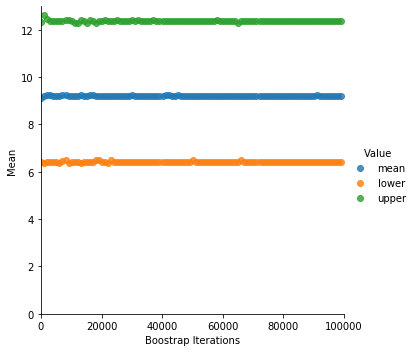

In [10]:

# Call your bootstrap function and plot the results

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')




Now, modify the bootstrap function so that you can pass your desired confidence interval as a parameter.



In [0]:
def boostrap_mean_ci(sample, sample_size, iterations, ci):
	# <---INSERT YOUR CODE HERE--->
	arr = np.random.choice(sample, size=(iterations, sample_size))
	mean_arr = [np.mean(x) for x in arr]
	perc = np.percentile(mean_arr, [(100 - ci)/2, ci + (100 - ci)/2])
	data_mean = np.mean(arr)
	return data_mean, perc[0], perc[1]

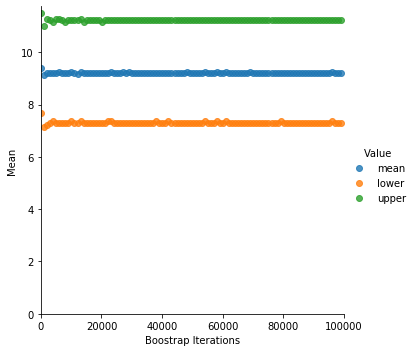

In [12]:

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset. Load the vehicles.csv file and check the Moodle page for instructions on how to proceed


In [13]:
# Load and visualise the vehicles dataset
# <---INSERT YOUR CODE HERE--->
# Note: you can add more cells as needed to organise your code and your plots
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
df.columns = ['Current fleet', 'New fleet']
df.head()


,Current fleet,New fleet
0,18,24.0
1,15,27.0
2,18,27.0
3,16,25.0
4,17,31.0


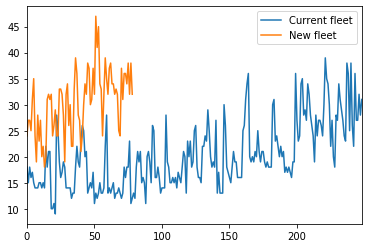

In [14]:
df.plot()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f434661b3c8>,
      dtype=object)

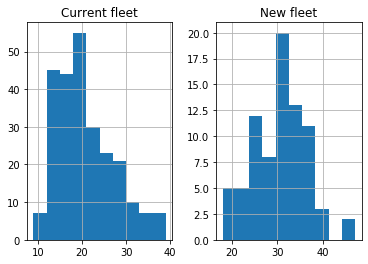

In [15]:
df.hist()

Separating the two fleet's data

In [0]:
current = df['Current fleet']
new = df['New fleet'].dropna()


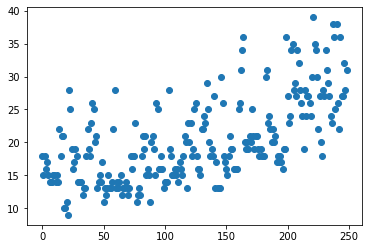

In [17]:
matplotlib.pyplot.scatter(np.arange(len(current)), current)

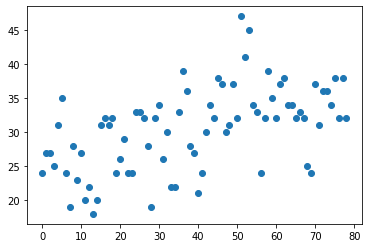

In [18]:
matplotlib.pyplot.scatter(np.arange(len(new)), new)


In [19]:
bootstrap_current = boostrap_mean_ci(current, current.shape[0], 100, 90)
bootstrap_new = boostrap_mean_ci(new, new.shape[0], 100, 90)

compare = np.subtract(bootstrap_new, bootstrap_current)
compare

array([10.31681155, 10.03315286, 10.46989985])

In [0]:
### Permutation
def permute(current, new, p_iterations = 100):

  #bootstrap_current = boostrap_mean_ci(current, current.shape[0], 100, 90)
  #bootstrap_new = boostrap_mean_ci(new, new.shape[0], 100, 90)
  compare = np.subtract(np.mean(new), np.mean(current))

  concat = np.concatenate((current, new))
  p_counter = 0
  for i in range(p_iterations):
    perm = np.random.permutation(concat)
    p_current = perm[:current.shape[0]]
    p_new = perm[current.shape[0]:]
    #boot_p_current = boostrap_mean_ci(p_current, p_current.shape[0], 100, 90)
    #boot_p_new = boostrap_mean_ci(p_new, p_new.shape[0], 100, 90)
    p_compare = np.subtract(np.mean(p_new), np.mean(p_current))
    if (p_compare > compare):
      p_counter+= 1


  p_value = p_counter/p_iterations

  print("P value = {}".format(p_value))
  return p_value

In [21]:
### testing class example

old = np.array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0])
new = np.array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

p = permute(old, new, 20000)


P value = 0.071
